# Worksheet 12

Name:  Jason Kwan

UID: U61451841 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1.  YES
2. NO
3. YES
4. NO

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

    Use the stored training records to predict the class label of unseen cases.
    
    Use the nearest neighbor classifier:

    Use SIMILAR records to perform classification, specifically the K Nearest Neighbor Classifier.


c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting: Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. It often results in poor performance because the model cannot represent the complexity of the data. Signs to look out for include high training and test errors, a model that seems overly generalized, and poor performance on both the training and test data.

Overfitting: Overfitting happens when a machine learning model is excessively complex and fits the training data too closely, capturing noise and irrelevant details. As a result, it performs well on the training data but poorly on unseen data. Signs of overfitting include very low training error but high test error, a model that appears overly specific to the training data, and significant performance degradation on the test data.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

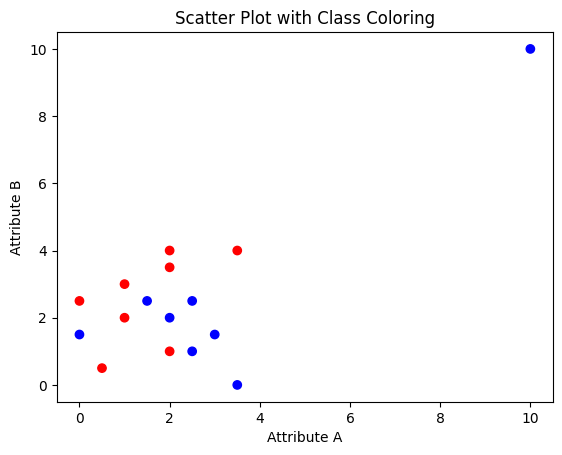

In [2]:
# colors = np.array([x for x in 'bgrcmyk'])
# plt.scatter(..., color=colors[data["Class"]].tolist())
# plt.show()

# Define colors for the classes (0 and 1)
colors = np.array(['b', 'r'])

# Scatter plot with colors based on the "Class" attribute
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot with Class Coloring")
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

From my method below, it doesn't look there are any points that are removed.

In [3]:
# Create a dictionary to store the removed points
removed_points = {
    "Attribute A": [],
    "Attribute B": [],
    "Class": []
}

# Calculate Z-scores for each data point in both attributes
z_scores_A = np.abs((data["Attribute A"] - np.mean(data["Attribute A"])) / np.std(data["Attribute A"]))
z_scores_B = np.abs((data["Attribute B"] - np.mean(data["Attribute B"])) / np.std(data["Attribute B"]))

# Set a Z-score threshold (e.g., 2 or 3 standard deviations)
z_score_threshold = 2

# Find the indices of potential outliers based on the Z-score threshold
outlier_indices_A = np.where(z_scores_A > z_score_threshold)
outlier_indices_B = np.where(z_scores_B > z_score_threshold)

# Combine indices from both attributes to get a list of outlier indices
outlier_indices = np.union1d(outlier_indices_A, outlier_indices_B)

# Store the removed points in the 'removed_points' dictionary
for key in data.keys():
    for i in outlier_indices:
        removed_points[key].append(data[key][i])

# Remove potential outliers from the dataset
for key in data.keys():
    data[key] = [data[key][i] for i in range(len(data[key])) if i not in outlier_indices]

# Print the removed points
print("Removed Points:")
for i in range(len(removed_points["Attribute A"])):
    print(f"Attribute A: {removed_points['Attribute A'][i]}, Attribute B: {removed_points['Attribute B'][i]}, Class: {removed_points['Class'][i]}")

# The dataset now contains potential outliers removed

Removed Points:
Attribute A: 10, Attribute B: 10, Class: 0


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

I think it's difficult to dtermine whether or not there are noise points in the dataset. From what I observe in the overall data though, I would say that all of the points are following a general trend and that there aren't any noise points in the data.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

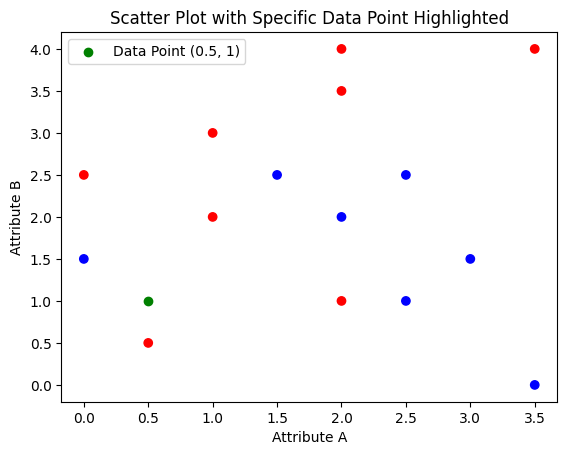

In [4]:
# Define colors for the classes (0 and 1)
colors = np.array(['b', 'r'])

# Scatter plot with colors based on the "Class" attribute
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])
plt.scatter(0.5, 1, color='g', label='Data Point (0.5, 1)')  # Plot the specific data point in green
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot with Specific Data Point Highlighted")
plt.legend()
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

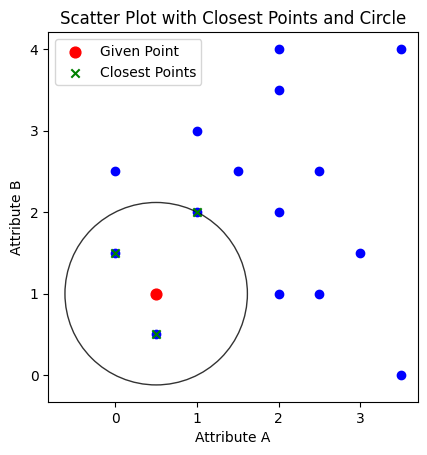

In [5]:
# def n_closest_to(example, n):
#     pass

# location = ( ... , ... )
# radius = ...
# _, axes = plt.subplots()
# axes.scatter(...)
# cir = plt.Circle(location, radius, fill = False, alpha=0.8)
# axes.add_patch(cir)
# axes.set_aspect('equal') # necessary so that the circle is not oval
# plt.show()

# Function to compute the Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to find the n closest points to a given point
def n_closest_to(example, n):
    distances = [euclidean_distance(example, (data["Attribute A"][i], data["Attribute B"][i])) for i in range(len(data["Attribute A"]))]
    closest_indices = np.argsort(distances)[:n]
    closest_points = [(data["Attribute A"][i], data["Attribute B"][i]) for i in closest_indices]
    return closest_points

# Specify the location (x, y) of the point
location = (0.5, 1)

# Compute the 3 closest points to the specified location
closest_points = n_closest_to(location, 3)

# Calculate the radius as the distance to the farthest of the three closest points
radius = max([euclidean_distance(location, point) for point in closest_points])

# Create a scatter plot
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color='blue')
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  # Necessary to ensure the circle is not oval
plt.scatter(*location, c='red', label='Given Point', s=60)
plt.scatter(*zip(*closest_points), c='green', marker='x', label='Closest Points')
plt.legend()
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot with Closest Points and Circle")
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
# Function to determine the majority class among the closest points
def majority(points):
    class_counts = {0: 0, 1: 0}  # Initialize counts for class 0 and class 1
    for point in points:
        class_counts[data["Class"][data["Attribute A"].index(point[0])]] += 1
    if class_counts[0] > class_counts[1]:
        return 0
    elif class_counts[1] > class_counts[0]:
        return 1
    else:
        # In the event of a tie, return a default class (e.g., class 0)
        return 0

# Specify the location (x, y) of the point
location = (0.5, 1)

# Compute the 3 closest points to the specified location
closest_points = n_closest_to(location, 3)

# Determine the majority class among the closest points
assigned_class = majority(closest_points)

# Print the class assigned to the new point
print("Class assigned to the new point:", assigned_class)

Class assigned to the new point: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
total_points = len(data["Attribute A"])

for i in range(total_points):
    # Store the actual class of the current point
    actual_class = data["Class"][i]

    # Create the training set (all points except the current point)
    training_set = [data["Attribute A"][:i] + data["Attribute A"][i+1:], data["Attribute B"][:i] + data["Attribute B"][i+1:]]
    
    # Classify the current point using the training set
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    closest_points = n_closest_to(test_point, 3)
    prediction = majority(closest_points)

    # Check if the prediction is correct and update the count
    if prediction == actual_class:
        count += 1

# Calculate the overall testing accuracy
accuracy = count / total_points

print("Overall accuracy =", accuracy) # IS THIS GOOD IDK?

Overall accuracy = 0.8666666666666667
